# HUBC MWRP 7 August 2023

In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
print(os.path.join(os.getcwd(), 'HUBC.mwrProf.RH.AngleScan(N).per5.20230807_df.txt'))
os.chdir("C:\\Users\\ken.pryor\\Documents\\0823\\HU-Beltsville.MWR.2023-08-07\\")
print(os.getcwd())

'''
HUBC MWR Profiles 2023-08-07 1800 UTC
'''
df_sdg_rh = pd.read_csv("HUBC.mwrProf.RH.AngleScan(N).per5.20230807_df.csv",header=None)
df_sdg_temp = pd.read_csv("HUBC.mwrProf.Tprof.AngleScan(N).per5.20230807_df.csv",header=None)

pressure = df_sdg_rh.iloc[1,1:59].tolist()
pressure_mb = np.array(pressure)
print("Pressure (mb): ", pressure_mb, pressure_mb.shape)
height = df_sdg_rh.iloc[0,1:59].tolist()
height_km = np.array(height)
print("Height (km): ", height_km, height_km.shape)
height_m = height_km * 1000
temperature_1800 = df_sdg_temp.iloc[217,1:59].tolist()
temperature = np.array(temperature_1800)
temperature_c = temperature - 273.15
print("Temperature (C): ", temperature_c, temperature_c.shape)
RH_pct_1800 = df_sdg_rh.iloc[217,1:59].tolist()
RH_pct = np.array(RH_pct_1800)
print("RH (%): ", RH_pct, RH_pct.shape)

dewpoint_c = 243.04*((np.log(RH_pct/100))+((17.625*temperature_c)/(243.04+temperature_c)))/(17.625-(np.log(RH_pct/100))-((17.625*temperature_c)/(243.04+temperature_c)))
dewpoint = dewpoint_c + 273.15
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_mb)**0.286)+(3 * (RH_pct * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))

print("Dew point (C): ", dewpoint_c, dewpoint_c.shape)
print("Theta-e (K): ", thetae, thetae.shape)

wetbulb = temperature_c*(np.arctan(0.151977*((RH_pct+8.313659)**0.5))) + (np.arctan(temperature_c+RH_pct)) - (np.arctan(RH_pct-1.676331))+((0.00391838*(RH_pct**1.5))*(np.arctan(0.023101*RH_pct))) - 4.686035
WBD = temperature_c - wetbulb
print("Wet bulb (C): ", wetbulb, wetbulb.shape)
print("Wet bulb depression (C): ", WBD, WBD.shape)
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
temperature_k = temperature_c + 273.15
tempvirt = temperature_k*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ", tempvirt_c, tempvirt_c.shape)
tempvirt_exc = tempvirt_c - temperature_c

mydata=dict(zip(('hght','pres','thtae','wetbulb','WBD','tempvirt','Tv exc'),(height_m,pressure_mb,thetae,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)
df_ret = pd.DataFrame.from_dict(mydata)
print(df_ret)

idx_pup = np.where(pressure_mb == 701.21)
idx_plo = np.where(pressure_mb == 954.61)
print("PUP idx = ", idx_pup)
print("PLO idx = ", idx_plo)
Z_upper = height_km[idx_pup]
Z_lower = height_km[idx_plo]
T_sfc = temperature_k[idx_plo]
T_top = temperature_k[idx_pup]
Te_sfc = thetae[idx_plo]
Te_top = thetae[idx_pup]
Tv_sfc = tempvirt_c[idx_plo]
Tv_top = tempvirt_c[idx_pup]
wetbulb_sfc = wetbulb[idx_plo]
wetbulb_top = wetbulb[idx_pup]
thetaw_sfc = thetaw[idx_pup]
delta_z = 2500
delta_zkm = 2.5
gamma = (T_sfc - T_top)/(delta_zkm)
gamma_Te = (Te_sfc - Te_top)/(Z_lower - Z_upper)
gamma_Tv = (Tv_sfc - Tv_top)/(delta_zkm)
gamma_wb = (wetbulb_sfc - wetbulb_top)/(delta_zkm)

print("")
print("Gamma = ", gamma)
if gamma > 4.8 and gamma <= 9.8:
    print("Conditional Instability") 
elif gamma > 9.8:
    print("Absolute Instability")
print("Theta-e Gamma = ", gamma_Te)
if gamma_Te < 0:
    print("Theta-e lapse rate is negative: potential instability")    
print("Tv Gamma = ", gamma_Tv)
print("Wetbulb Gamma = ", gamma_wb)
if gamma_wb > 4.8:
    print("Potential Instability")    
    
mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_mb,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)
df_ret = pd.DataFrame.from_dict(mydata)
print(df_ret)
wdir = []
wspd = []
wval = -9999.00
data_len = len(df_ret)
print("DF Length = ", data_len)
for i in range(data_len):
    wdir.append(wval)
    wspd.append(wval)
print("wdir, wspd: ", wdir, wspd)
data_sharppy=dict(zip(('pres','hght','temp','dwpt'),(pressure_mb, height_m, temperature_c, dewpoint_c)))
print(data_sharppy)
df_sharppy = pd.DataFrame.from_dict(data_sharppy)
print(df_sharppy)
df_sharppy = df_sharppy[['pres', 'hght', 'temp', 'dwpt']]
print(df_sharppy)
df_sharppy_wind =df_sharppy.assign(wdir = wdir, wspd = wspd)
print(df_sharppy_wind)
print("")
print("Sharppy formatted retrieval: ")
print("")
print(df_sharppy_wind.to_string(header=False, index=False, formatters={"pres": "  {:.2f},  ".format, "hght": "{:.2f},  ".format,
                                                                       "temp": "{:.2f},  ".format, "dwpt": "{:.2f},  ".format,
                                                                       "wdir": "{:.2f},  ".format, "wspd": "{:.2f} ".format}))

P_level_upper = pressure_mb[idx_pup]
P_level_lower = pressure_mb[idx_plo]
Z_upper = height_km[idx_pup]
Z_lower = height_km[idx_plo]
T_upper = temperature_c[idx_pup]
T_lower = temperature_c[idx_plo]
Tv_upper = tempvirt_c[idx_pup]
Tv_lower = tempvirt_c[idx_plo]
TD_upper = dewpoint_c[idx_pup]
TD_lower = dewpoint_c[idx_plo]
CAPE = 2434
DCAPE = 813
 
def MWPI(P_level_upper, P_level_lower, Z_upper, Z_lower, T_upper, T_lower, TD_upper, TD_lower, CAPE, DCAPE):
        gamma = (T_lower - T_upper)/(Z_upper - Z_lower)
        DD_upper = T_upper - TD_upper
        DD_lower = T_lower - TD_lower
        DDD = DD_lower - DD_upper
        MWPI = (CAPE/1000) + (gamma/5) + (DDD/5)
        WGP = (0.35435365777 * (MWPI**2)) + (1.2959855*MWPI) + 33.8176788
        WGP_DCAPE = WGP_DCAPE = (2*DCAPE)**0.5
        WGP_DCAPE_KT = WGP_DCAPE * 1.94384
        return MWPI, WGP, WGP_DCAPE_KT    
MWPI, WGP, WGP_DCAPE_KT  = MWPI(P_level_upper, P_level_lower, Z_upper, Z_lower, T_upper, T_lower, TD_upper, TD_lower, CAPE, DCAPE)    
print("")
print("MWPI = ", MWPI)
print("MWPI WGP (kt) = ", WGP)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", WGP_DCAPE_KT)

def MWPI_Tv(P_level_upper, P_level_lower, Z_upper, Z_lower, Tv_upper, Tv_lower, TD_upper, TD_lower, CAPE):
        gamma = (Tv_lower - Tv_upper)/(Z_upper - Z_lower)
        DD_upper = Tv_upper - TD_upper
        DD_lower = Tv_lower - TD_lower
        DDD = DD_lower - DD_upper
        MWPI_Tv = (CAPE/1000) + (gamma/5) + (DDD/5)
        WGP_Tv = (0.35435365777 * (MWPI_Tv**2)) + (1.2959855*MWPI_Tv) + 33.8176788
        return MWPI_Tv, WGP_Tv
MWPI_Tv, WGP_Tv  = MWPI_Tv(P_level_upper, P_level_lower, Z_upper, Z_lower, Tv_upper, Tv_lower, TD_upper, TD_lower, CAPE)    
print("")
print("MWPI from Virtual Temperature:")
print("MWPI = ", MWPI_Tv)
print("MWPI WGP (kt) = ", WGP_Tv)

C:\Users\ken.pryor\Documents\0823\HU-Beltsville.MWR.2023-08-07\HUBC.mwrProf.RH.AngleScan(N).per5.20230807_df.txt
C:\Users\ken.pryor\Documents\0823\HU-Beltsville.MWR.2023-08-07
('Pressure (mb): ', array([1013.25 , 1007.38 , 1001.52 ,  995.65 ,  989.79 ,  983.93 ,
        978.   ,  972.2  ,  966.34 ,  960.47 ,  954.61 ,  943.44 ,
        932.27 ,  921.1  ,  909.93 ,  898.76 ,  888.126,  877.492,
        866.858,  856.224,  845.59 ,  835.474,  825.358,  815.242,
        805.126,  795.01 ,  770.96 ,  746.91 ,  724.06 ,  701.21 ,
        679.505,  657.8  ,  637.2  ,  616.6  ,  597.06 ,  577.52 ,
        559.   ,  540.48 ,  522.935,  505.39 ,  488.78 ,  472.17 ,
        456.46 ,  440.75 ,  425.9  ,  411.05 ,  397.02 ,  382.99 ,
        369.75 ,  356.51 ,  344.025,  331.54 ,  319.77 ,  308.   ,
        296.92 ,  285.84 ,  275.415,  264.99 ]), (58,))
('Height (km): ', array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.6 ,  0.7 ,  0.8 ,  0.9 ,  1.  ,  

        pres     hght   temp       dwpt    wdir    wspd
0   1013.250      0.0  30.75  21.717672 -9999.0 -9999.0
1   1007.380     50.0  29.15  21.004527 -9999.0 -9999.0
2   1001.520    100.0  27.96  20.602038 -9999.0 -9999.0
3    995.650    150.0  27.41  21.183560 -9999.0 -9999.0
4    989.790    200.0  26.98  21.193097 -9999.0 -9999.0
5    983.930    250.0  26.81  21.438246 -9999.0 -9999.0
6    978.000    300.0  26.62  21.167732 -9999.0 -9999.0
7    972.200    350.0  26.39  21.251512 -9999.0 -9999.0
8    966.340    400.0  26.12  21.303873 -9999.0 -9999.0
9    960.470    450.0  25.96  21.320774 -9999.0 -9999.0
10   954.610    500.0  25.68  20.796707 -9999.0 -9999.0
11   943.440    600.0  24.75  19.434701 -9999.0 -9999.0
12   932.270    700.0  23.91  18.656372 -9999.0 -9999.0
13   921.100    800.0  23.07  17.921279 -9999.0 -9999.0
14   909.930    900.0  22.30  16.913823 -9999.0 -9999.0
15   898.760   1000.0  21.58  16.262141 -9999.0 -9999.0
16   888.126   1100.0  21.01  15.965719 -9999.0 

In [3]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
print(os.path.join(os.getcwd(), 'HUBC.mwrProf.RH.AngleScan(N).per5.20230807_df.txt'))
os.chdir("C:\\Users\\ken.pryor\\Documents\\0823\\HU-Beltsville.MWR.2023-08-07\\")
print(os.getcwd())

'''
HUBC MWR Profiles 2023-08-07 1900 UTC
'''
df_sdg_rh = pd.read_csv("HUBC.mwrProf.RH.AngleScan(N).per5.20230807_df.csv",header=None)
df_sdg_temp = pd.read_csv("HUBC.mwrProf.Tprof.AngleScan(N).per5.20230807_df.csv",header=None)

pressure = df_sdg_rh.iloc[1,1:59].tolist()
pressure_mb = np.array(pressure)
print("Pressure (mb): ", pressure_mb, pressure_mb.shape)
height = df_sdg_rh.iloc[0,1:59].tolist()
height_km = np.array(height)
print("Height (km): ", height_km, height_km.shape)
height_m = height_km * 1000
temperature_1900 = df_sdg_temp.iloc[229,1:59].tolist()
temperature = np.array(temperature_1900)
temperature_c = temperature - 273.15
print("Temperature (C): ", temperature_c, temperature_c.shape)
RH_pct_1900 = df_sdg_rh.iloc[229,1:59].tolist()
RH_pct = np.array(RH_pct_1900)
print("RH (%): ", RH_pct, RH_pct.shape)

dewpoint_c = 243.04*((np.log(RH_pct/100))+((17.625*temperature_c)/(243.04+temperature_c)))/(17.625-(np.log(RH_pct/100))-((17.625*temperature_c)/(243.04+temperature_c)))
dewpoint = dewpoint_c + 273.15
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_mb)**0.286)+(3 * (RH_pct * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))

print("Dew point (C): ", dewpoint_c, dewpoint_c.shape)
print("Theta-e (K): ", thetae, thetae.shape)

wetbulb = temperature_c*(np.arctan(0.151977*((RH_pct+8.313659)**0.5))) + (np.arctan(temperature_c+RH_pct)) - (np.arctan(RH_pct-1.676331))+((0.00391838*(RH_pct**1.5))*(np.arctan(0.023101*RH_pct))) - 4.686035
WBD = temperature_c - wetbulb
print("Wet bulb (C): ", wetbulb, wetbulb.shape)
print("Wet bulb depression (C): ", WBD, WBD.shape)
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
temperature_k = temperature_c + 273.15
tempvirt = temperature_k*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ", tempvirt_c, tempvirt_c.shape)
tempvirt_exc = tempvirt_c - temperature_c

mydata=dict(zip(('hght','pres','thtae','wetbulb','WBD','tempvirt','Tv exc'),(height_m,pressure_mb,thetae,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)
df_ret = pd.DataFrame.from_dict(mydata)
print(df_ret)

idx_pup = np.where(pressure_mb == 701.21)
idx_plo = np.where(pressure_mb == 954.61)
print("PUP idx = ", idx_pup)
print("PLO idx = ", idx_plo)
Z_upper = height_km[idx_pup]
Z_lower = height_km[idx_plo]
T_sfc = temperature_k[idx_plo]
T_top = temperature_k[idx_pup]
Te_sfc = thetae[idx_plo]
Te_top = thetae[idx_pup]
Tv_sfc = tempvirt_c[idx_plo]
Tv_top = tempvirt_c[idx_pup]
wetbulb_sfc = wetbulb[idx_plo]
wetbulb_top = wetbulb[idx_pup]
thetaw_sfc = thetaw[idx_pup]
delta_z = 2500
delta_zkm = 2.5
gamma = (T_sfc - T_top)/(delta_zkm)
gamma_Te = (Te_sfc - Te_top)/(Z_lower - Z_upper)
gamma_Tv = (Tv_sfc - Tv_top)/(delta_zkm)
gamma_wb = (wetbulb_sfc - wetbulb_top)/(delta_zkm)

print("")
print("Gamma = ", gamma)
if gamma > 4.8 and gamma <= 9.8:
    print("Conditional Instability") 
elif gamma > 9.8:
    print("Absolute Instability")
print("Theta-e Gamma = ", gamma_Te)
if gamma_Te < 0:
    print("Theta-e lapse rate is negative: potential instability")    
print("Tv Gamma = ", gamma_Tv)
print("Wetbulb Gamma = ", gamma_wb)
if gamma_wb > 4.8:
    print("Potential Instability")    
    
mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_mb,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)
df_ret = pd.DataFrame.from_dict(mydata)
print(df_ret)
wdir = []
wspd = []
wval = -9999.00
data_len = len(df_ret)
print("DF Length = ", data_len)
for i in range(data_len):
    wdir.append(wval)
    wspd.append(wval)
print("wdir, wspd: ", wdir, wspd)
data_sharppy=dict(zip(('pres','hght','temp','dwpt'),(pressure_mb, height_m, temperature_c, dewpoint_c)))
print(data_sharppy)
df_sharppy = pd.DataFrame.from_dict(data_sharppy)
print(df_sharppy)
df_sharppy = df_sharppy[['pres', 'hght', 'temp', 'dwpt']]
print(df_sharppy)
df_sharppy_wind =df_sharppy.assign(wdir = wdir, wspd = wspd)
print(df_sharppy_wind)
print("")
print("Sharppy formatted retrieval: ")
print("")
print(df_sharppy_wind.to_string(header=False, index=False, formatters={"pres": "  {:.2f},  ".format, "hght": "{:.2f},  ".format,
                                                                       "temp": "{:.2f},  ".format, "dwpt": "{:.2f},  ".format,
                                                                       "wdir": "{:.2f},  ".format, "wspd": "{:.2f} ".format}))

P_level_upper = pressure_mb[idx_pup]
P_level_lower = pressure_mb[idx_plo]
Z_upper = height_km[idx_pup]
Z_lower = height_km[idx_plo]
T_upper = temperature_c[idx_pup]
T_lower = temperature_c[idx_plo]
Tv_upper = tempvirt_c[idx_pup]
Tv_lower = tempvirt_c[idx_plo]
TD_upper = dewpoint_c[idx_pup]
TD_lower = dewpoint_c[idx_plo]
CAPE = 2699
DCAPE = 844
 
def MWPI(P_level_upper, P_level_lower, Z_upper, Z_lower, T_upper, T_lower, TD_upper, TD_lower, CAPE, DCAPE):
        gamma = (T_lower - T_upper)/(Z_upper - Z_lower)
        DD_upper = T_upper - TD_upper
        DD_lower = T_lower - TD_lower
        DDD = DD_lower - DD_upper
        MWPI = (CAPE/1000) + (gamma/5) + (DDD/5)
        WGP = (0.35435365777 * (MWPI**2)) + (1.2959855*MWPI) + 33.8176788
        WGP_DCAPE = WGP_DCAPE = (2*DCAPE)**0.5
        WGP_DCAPE_KT = WGP_DCAPE * 1.94384
        return MWPI, WGP, WGP_DCAPE_KT    
MWPI, WGP, WGP_DCAPE_KT  = MWPI(P_level_upper, P_level_lower, Z_upper, Z_lower, T_upper, T_lower, TD_upper, TD_lower, CAPE, DCAPE)    
print("")
print("MWPI = ", MWPI)
print("MWPI WGP (kt) = ", WGP)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", WGP_DCAPE_KT)

def MWPI_Tv(P_level_upper, P_level_lower, Z_upper, Z_lower, Tv_upper, Tv_lower, TD_upper, TD_lower, CAPE):
        gamma = (Tv_lower - Tv_upper)/(Z_upper - Z_lower)
        DD_upper = Tv_upper - TD_upper
        DD_lower = Tv_lower - TD_lower
        DDD = DD_lower - DD_upper
        MWPI_Tv = (CAPE/1000) + (gamma/5) + (DDD/5)
        WGP_Tv = (0.35435365777 * (MWPI_Tv**2)) + (1.2959855*MWPI_Tv) + 33.8176788
        return MWPI_Tv, WGP_Tv
MWPI_Tv, WGP_Tv  = MWPI_Tv(P_level_upper, P_level_lower, Z_upper, Z_lower, Tv_upper, Tv_lower, TD_upper, TD_lower, CAPE)    
print("")
print("MWPI from Virtual Temperature:")
print("MWPI = ", MWPI_Tv)
print("MWPI WGP (kt) = ", WGP_Tv)

C:\Users\ken.pryor\Documents\0823\HU-Beltsville.MWR.2023-08-07\HUBC.mwrProf.RH.AngleScan(N).per5.20230807_df.txt
C:\Users\ken.pryor\Documents\0823\HU-Beltsville.MWR.2023-08-07
('Pressure (mb): ', array([1013.25 , 1007.38 , 1001.52 ,  995.65 ,  989.79 ,  983.93 ,
        978.   ,  972.2  ,  966.34 ,  960.47 ,  954.61 ,  943.44 ,
        932.27 ,  921.1  ,  909.93 ,  898.76 ,  888.126,  877.492,
        866.858,  856.224,  845.59 ,  835.474,  825.358,  815.242,
        805.126,  795.01 ,  770.96 ,  746.91 ,  724.06 ,  701.21 ,
        679.505,  657.8  ,  637.2  ,  616.6  ,  597.06 ,  577.52 ,
        559.   ,  540.48 ,  522.935,  505.39 ,  488.78 ,  472.17 ,
        456.46 ,  440.75 ,  425.9  ,  411.05 ,  397.02 ,  382.99 ,
        369.75 ,  356.51 ,  344.025,  331.54 ,  319.77 ,  308.   ,
        296.92 ,  285.84 ,  275.415,  264.99 ]), (58,))
('Height (km): ', array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.6 ,  0.7 ,  0.8 ,  0.9 ,  1.  ,  

In [2]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
print(os.path.join(os.getcwd(), 'HUBC.mwrProf.RH.AngleScan(N).per5.20230807_df.txt'))
os.chdir("C:\\Users\\ken.pryor\\Documents\\0823\\HU-Beltsville.MWR.2023-08-07\\")
print(os.getcwd())

'''
HUBC MWR Profiles 2023-08-07 2000 UTC
'''
df_sdg_rh = pd.read_csv("HUBC.mwrProf.RH.AngleScan(N).per5.20230807_df.csv",header=None)
df_sdg_temp = pd.read_csv("HUBC.mwrProf.Tprof.AngleScan(N).per5.20230807_df.csv",header=None)

pressure = df_sdg_rh.iloc[1,1:59].tolist()
pressure_mb = np.array(pressure)
print("Pressure (mb): ", pressure_mb, pressure_mb.shape)
height = df_sdg_rh.iloc[0,1:59].tolist()
height_km = np.array(height)
print("Height (km): ", height_km, height_km.shape)
height_m = height_km * 1000
temperature_2000 = df_sdg_temp.iloc[241,1:59].tolist()
temperature = np.array(temperature_2000)
temperature_c = temperature - 273.15
print("Temperature (C): ", temperature_c, temperature_c.shape)
RH_pct_2000 = df_sdg_rh.iloc[241,1:59].tolist()
RH_pct = np.array(RH_pct_2000)
print("RH (%): ", RH_pct, RH_pct.shape)

dewpoint_c = 243.04*((np.log(RH_pct/100))+((17.625*temperature_c)/(243.04+temperature_c)))/(17.625-(np.log(RH_pct/100))-((17.625*temperature_c)/(243.04+temperature_c)))
dewpoint = dewpoint_c + 273.15
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_mb)**0.286)+(3 * (RH_pct * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))

print("Dew point (C): ", dewpoint_c, dewpoint_c.shape)
print("Theta-e (K): ", thetae, thetae.shape)

wetbulb = temperature_c*(np.arctan(0.151977*((RH_pct+8.313659)**0.5))) + (np.arctan(temperature_c+RH_pct)) - (np.arctan(RH_pct-1.676331))+((0.00391838*(RH_pct**1.5))*(np.arctan(0.023101*RH_pct))) - 4.686035
WBD = temperature_c - wetbulb
print("Wet bulb (C): ", wetbulb, wetbulb.shape)
print("Wet bulb depression (C): ", WBD, WBD.shape)
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
temperature_k = temperature_c + 273.15
tempvirt = temperature_k*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ", tempvirt_c, tempvirt_c.shape)
tempvirt_exc = tempvirt_c - temperature_c

mydata=dict(zip(('hght','pres','thtae','wetbulb','WBD','tempvirt','Tv exc'),(height_m,pressure_mb,thetae,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)
df_ret = pd.DataFrame.from_dict(mydata)
print(df_ret)

idx_pup = np.where(pressure_mb == 701.21)
idx_plo = np.where(pressure_mb == 954.61)
print("PUP idx = ", idx_pup)
print("PLO idx = ", idx_plo)
Z_upper = height_km[idx_pup]
Z_lower = height_km[idx_plo]
T_sfc = temperature_k[idx_plo]
T_top = temperature_k[idx_pup]
Te_sfc = thetae[idx_plo]
Te_top = thetae[idx_pup]
Tv_sfc = tempvirt_c[idx_plo]
Tv_top = tempvirt_c[idx_pup]
wetbulb_sfc = wetbulb[idx_plo]
wetbulb_top = wetbulb[idx_pup]
thetaw_sfc = thetaw[idx_pup]
delta_z = 2500
delta_zkm = 2.5
gamma = (T_sfc - T_top)/(delta_zkm)
gamma_Te = (Te_sfc - Te_top)/(Z_lower - Z_upper)
gamma_Tv = (Tv_sfc - Tv_top)/(delta_zkm)
gamma_wb = (wetbulb_sfc - wetbulb_top)/(delta_zkm)

print("")
print("Gamma = ", gamma)
if gamma > 4.8 and gamma <= 9.8:
    print("Conditional Instability") 
elif gamma > 9.8:
    print("Absolute Instability")
print("Theta-e Gamma = ", gamma_Te)
if gamma_Te < 0:
    print("Theta-e lapse rate is negative: potential instability")    
print("Tv Gamma = ", gamma_Tv)
print("Wetbulb Gamma = ", gamma_wb)
if gamma_wb > 4.8:
    print("Potential Instability")    
    
mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_mb,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)
df_ret = pd.DataFrame.from_dict(mydata)
print(df_ret)
wdir = []
wspd = []
wval = -9999.00
data_len = len(df_ret)
print("DF Length = ", data_len)
for i in range(data_len):
    wdir.append(wval)
    wspd.append(wval)
print("wdir, wspd: ", wdir, wspd)
data_sharppy=dict(zip(('pres','hght','temp','dwpt'),(pressure_mb, height_m, temperature_c, dewpoint_c)))
print(data_sharppy)
df_sharppy = pd.DataFrame.from_dict(data_sharppy)
print(df_sharppy)
df_sharppy = df_sharppy[['pres', 'hght', 'temp', 'dwpt']]
print(df_sharppy)
df_sharppy_wind =df_sharppy.assign(wdir = wdir, wspd = wspd)
print(df_sharppy_wind)
print("")
print("Sharppy formatted retrieval: ")
print("")
print(df_sharppy_wind.to_string(header=False, index=False, formatters={"pres": "  {:.2f},  ".format, "hght": "{:.2f},  ".format,
                                                                       "temp": "{:.2f},  ".format, "dwpt": "{:.2f},  ".format,
                                                                       "wdir": "{:.2f},  ".format, "wspd": "{:.2f} ".format}))

P_level_upper = pressure_mb[idx_pup]
P_level_lower = pressure_mb[idx_plo]
Z_upper = height_km[idx_pup]
Z_lower = height_km[idx_plo]
T_upper = temperature_c[idx_pup]
T_lower = temperature_c[idx_plo]
Tv_upper = tempvirt_c[idx_pup]
Tv_lower = tempvirt_c[idx_plo]
TD_upper = dewpoint_c[idx_pup]
TD_lower = dewpoint_c[idx_plo]
CAPE = 2384
DCAPE = 857
 
def MWPI(P_level_upper, P_level_lower, Z_upper, Z_lower, T_upper, T_lower, TD_upper, TD_lower, CAPE, DCAPE):
        gamma = (T_lower - T_upper)/(Z_upper - Z_lower)
        DD_upper = T_upper - TD_upper
        DD_lower = T_lower - TD_lower
        DDD = DD_lower - DD_upper
        MWPI = (CAPE/1000) + (gamma/5) + (DDD/5)
        WGP = (0.35435365777 * (MWPI**2)) + (1.2959855*MWPI) + 33.8176788
        WGP_DCAPE = WGP_DCAPE = (2*DCAPE)**0.5
        WGP_DCAPE_KT = WGP_DCAPE * 1.94384
        return MWPI, WGP, WGP_DCAPE_KT    
MWPI, WGP, WGP_DCAPE_KT  = MWPI(P_level_upper, P_level_lower, Z_upper, Z_lower, T_upper, T_lower, TD_upper, TD_lower, CAPE, DCAPE)    
print("")
print("MWPI = ", MWPI)
print("MWPI WGP (kt) = ", WGP)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", WGP_DCAPE_KT)

def MWPI_Tv(P_level_upper, P_level_lower, Z_upper, Z_lower, Tv_upper, Tv_lower, TD_upper, TD_lower, CAPE):
        gamma = (Tv_lower - Tv_upper)/(Z_upper - Z_lower)
        DD_upper = Tv_upper - TD_upper
        DD_lower = Tv_lower - TD_lower
        DDD = DD_lower - DD_upper
        MWPI_Tv = (CAPE/1000) + (gamma/5) + (DDD/5)
        WGP_Tv = (0.35435365777 * (MWPI_Tv**2)) + (1.2959855*MWPI_Tv) + 33.8176788
        return MWPI_Tv, WGP_Tv
MWPI_Tv, WGP_Tv  = MWPI_Tv(P_level_upper, P_level_lower, Z_upper, Z_lower, Tv_upper, Tv_lower, TD_upper, TD_lower, CAPE)    
print("")
print("MWPI from Virtual Temperature:")
print("MWPI = ", MWPI_Tv)
print("MWPI WGP (kt) = ", WGP_Tv)

C:\Users\ken.pryor\Documents\0823\HU-Beltsville.MWR.2023-08-07\HUBC.mwrProf.RH.AngleScan(N).per5.20230807_df.txt
C:\Users\ken.pryor\Documents\0823\HU-Beltsville.MWR.2023-08-07
('Pressure (mb): ', array([1013.25 , 1007.38 , 1001.52 ,  995.65 ,  989.79 ,  983.93 ,
        978.   ,  972.2  ,  966.34 ,  960.47 ,  954.61 ,  943.44 ,
        932.27 ,  921.1  ,  909.93 ,  898.76 ,  888.126,  877.492,
        866.858,  856.224,  845.59 ,  835.474,  825.358,  815.242,
        805.126,  795.01 ,  770.96 ,  746.91 ,  724.06 ,  701.21 ,
        679.505,  657.8  ,  637.2  ,  616.6  ,  597.06 ,  577.52 ,
        559.   ,  540.48 ,  522.935,  505.39 ,  488.78 ,  472.17 ,
        456.46 ,  440.75 ,  425.9  ,  411.05 ,  397.02 ,  382.99 ,
        369.75 ,  356.51 ,  344.025,  331.54 ,  319.77 ,  308.   ,
        296.92 ,  285.84 ,  275.415,  264.99 ]), (58,))
('Height (km): ', array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.6 ,  0.7 ,  0.8 ,  0.9 ,  1.  ,  


Sharppy formatted retrieval: 

  1013.25,       0.00,    30.77,    22.45,   -9999.00,   -9999.00 
  1007.38,      50.00,    30.42,    22.25,   -9999.00,   -9999.00 
  1001.52,     100.00,    29.91,    21.96,   -9999.00,   -9999.00 
   995.65,     150.00,    29.65,    22.14,   -9999.00,   -9999.00 
   989.79,     200.00,    29.24,    21.84,   -9999.00,   -9999.00 
   983.93,     250.00,    28.97,    21.78,   -9999.00,   -9999.00 
   978.00,     300.00,    28.60,    21.41,   -9999.00,   -9999.00 
   972.20,     350.00,    28.20,    21.41,   -9999.00,   -9999.00 
   966.34,     400.00,    27.75,    21.44,   -9999.00,   -9999.00 
   960.47,     450.00,    27.44,    21.42,   -9999.00,   -9999.00 
   954.61,     500.00,    26.99,    20.94,   -9999.00,   -9999.00 
   943.44,     600.00,    25.85,    19.78,   -9999.00,   -9999.00 
   932.27,     700.00,    24.80,    19.03,   -9999.00,   -9999.00 
   921.10,     800.00,    23.79,    18.33,   -9999.00,   -9999.00 
   909.93,     900.00,    23.0

C:\Users\ken.pryor\Documents\0823\HU-Beltsville.MWR.2023-08-07\HUBC.mwrProf.RH.AngleScan(N).per5.20230807_df.txt
C:\Users\ken.pryor\Documents\0823\HU-Beltsville.MWR.2023-08-07
('Pressure (mb): ', array([1013.25 , 1007.38 , 1001.52 ,  995.65 ,  989.79 ,  983.93 ,
        978.   ,  972.2  ,  966.34 ,  960.47 ,  954.61 ,  943.44 ,
        932.27 ,  921.1  ,  909.93 ,  898.76 ,  888.126,  877.492,
        866.858,  856.224,  845.59 ,  835.474,  825.358,  815.242,
        805.126,  795.01 ,  770.96 ,  746.91 ,  724.06 ,  701.21 ,
        679.505,  657.8  ,  637.2  ,  616.6  ,  597.06 ,  577.52 ,
        559.   ,  540.48 ,  522.935,  505.39 ,  488.78 ,  472.17 ,
        456.46 ,  440.75 ,  425.9  ,  411.05 ,  397.02 ,  382.99 ,
        369.75 ,  356.51 ,  344.025,  331.54 ,  319.77 ,  308.   ,
        296.92 ,  285.84 ,  275.415,  264.99 ]), (58,))
('Height (km): ', array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.6 ,  0.7 ,  0.8 ,  0.9 ,  1.  ,  

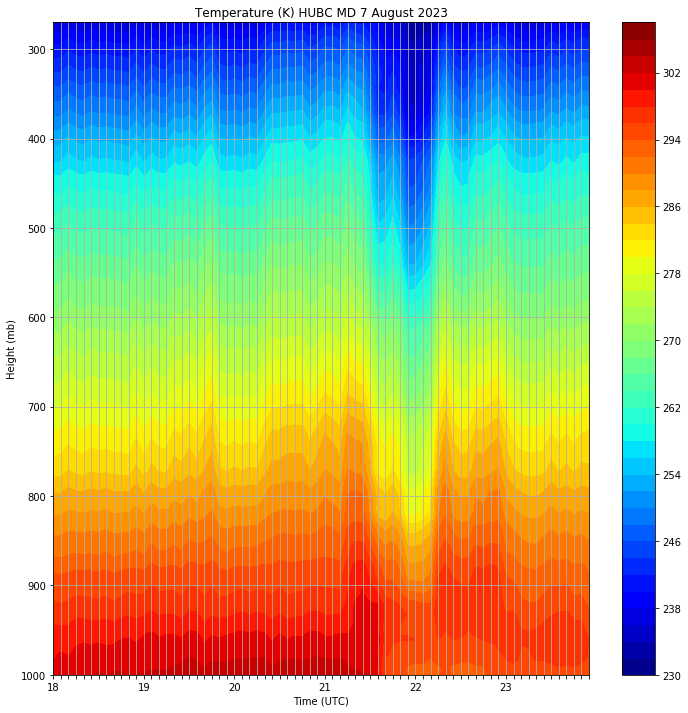

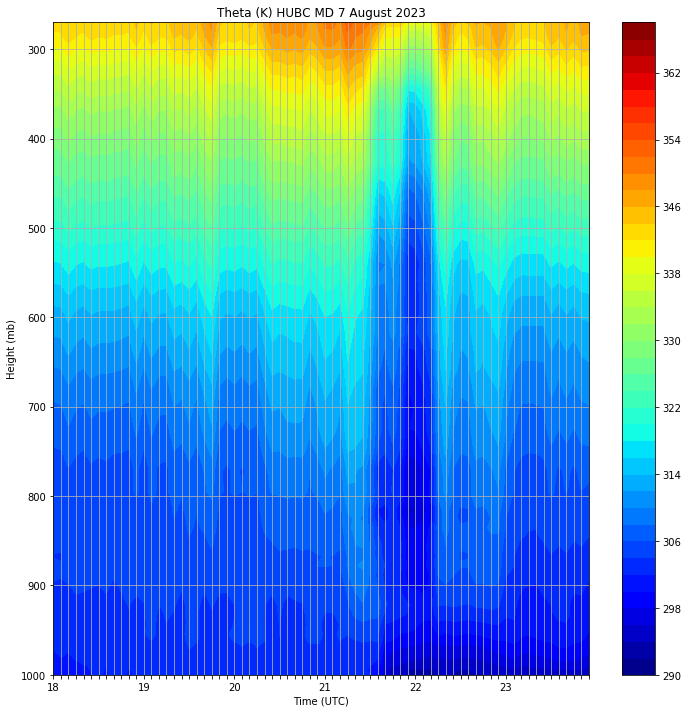

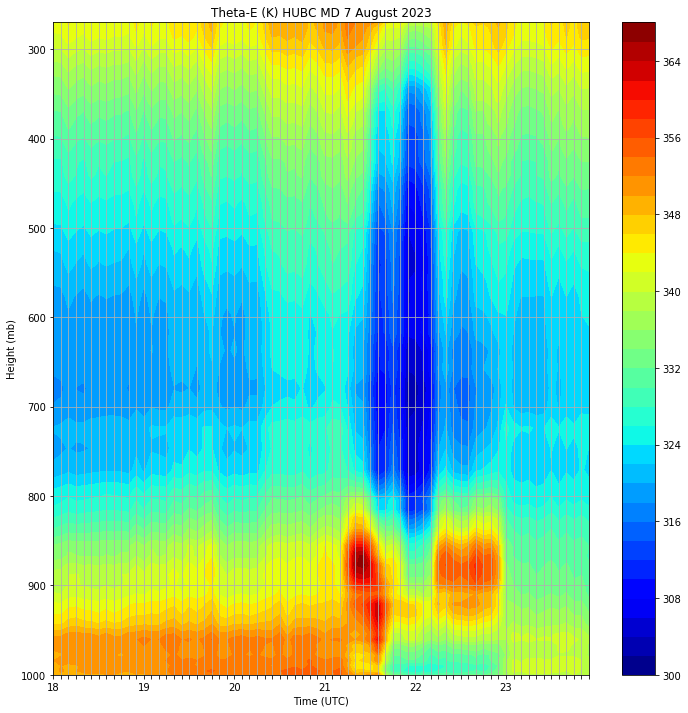

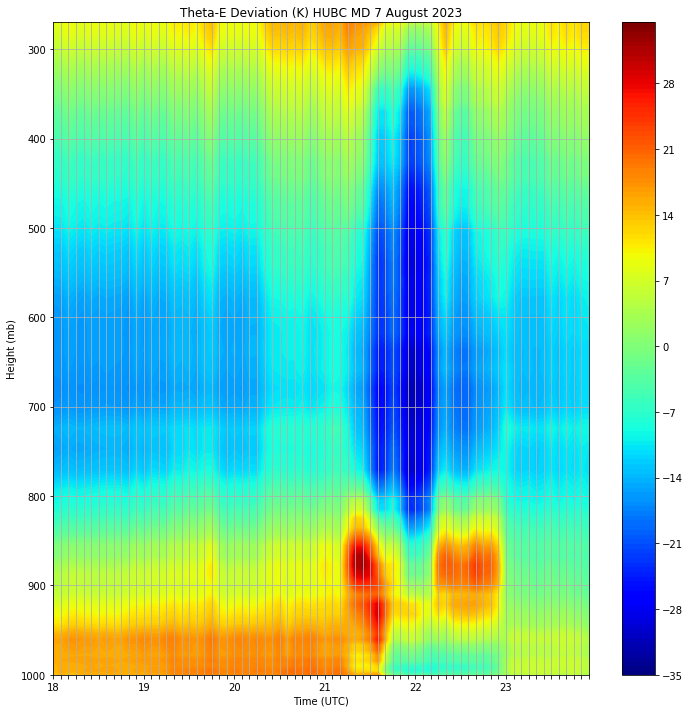

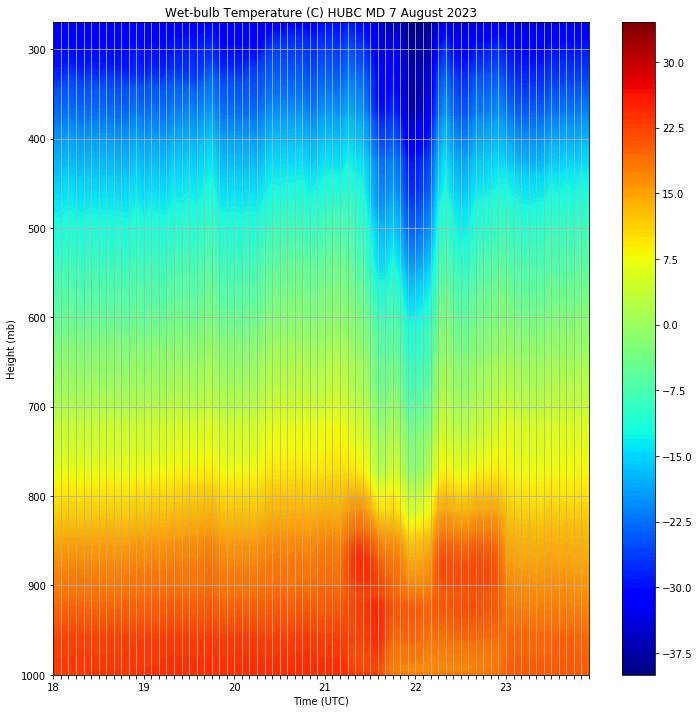

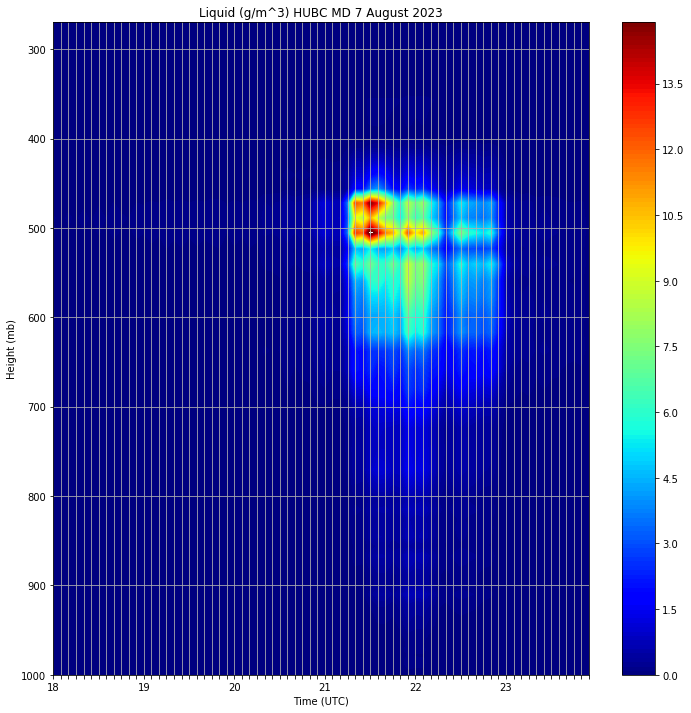

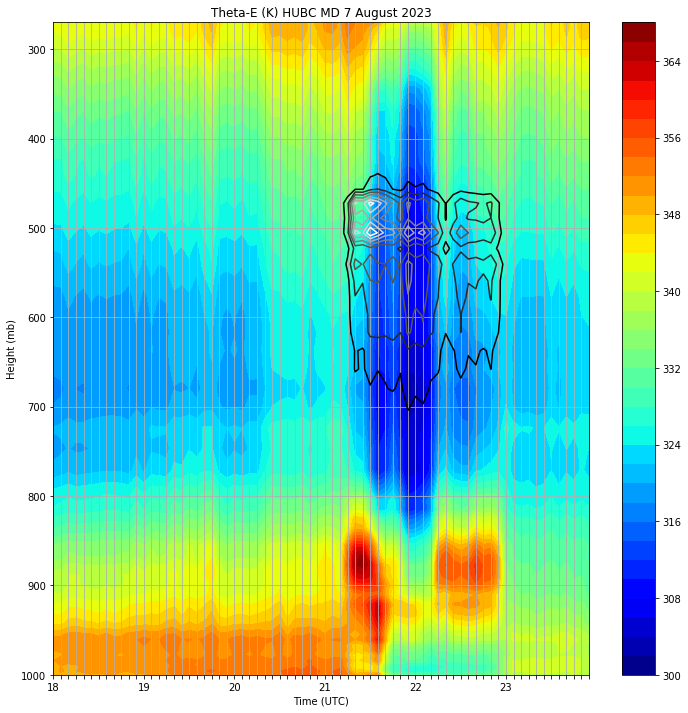

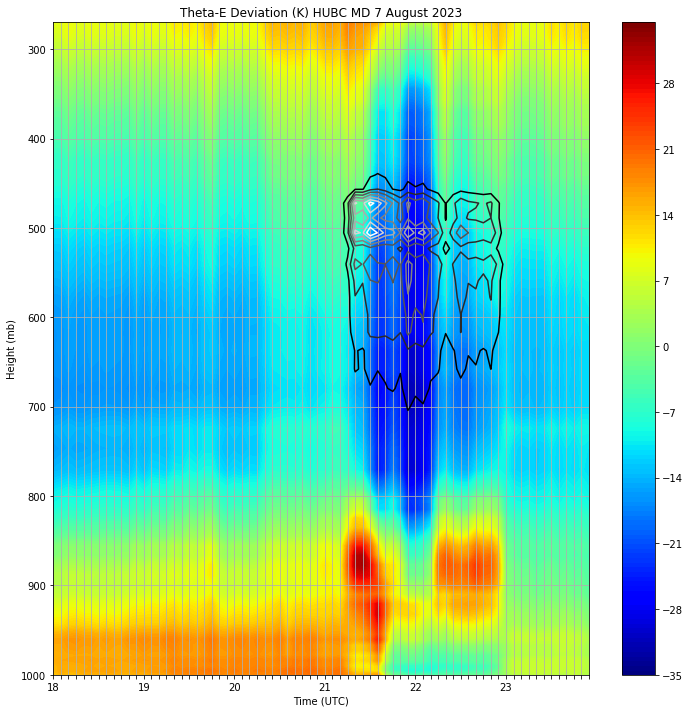

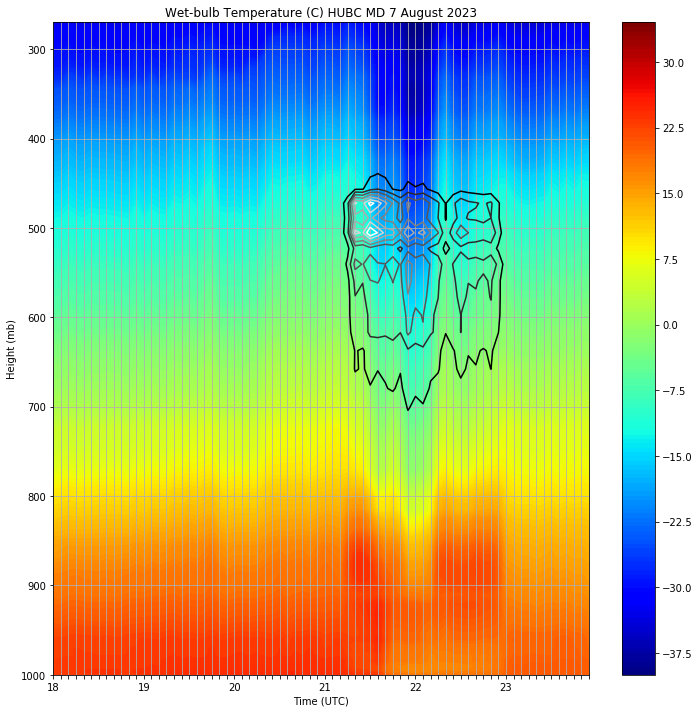

In [5]:
from __future__ import division
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import os
print(os.path.join(os.getcwd(), 'HUBC.mwrProf.RH.AngleScan(N).per5.20230807_df.txt'))
os.chdir("C:\\Users\\ken.pryor\\Documents\\0823\\HU-Beltsville.MWR.2023-08-07\\")
print(os.getcwd())

'''
HUBC MWR Profiles 2023-08-07 
'''
df_sdg_rh = pd.read_csv("HUBC.mwrProf.RH.AngleScan(N).per5.20230807_df.csv",header=None)
df_sdg_temp = pd.read_csv("HUBC.mwrProf.Tprof.AngleScan(N).per5.20230807_df.csv",header=None)
df_sdg_liq = pd.read_csv("HUBC.mwrProf.lwc.AngleScan(N).per5.20230807_df.csv",header=None)

pressure = df_sdg_rh.iloc[1,1:59].tolist()
pressure_mb = np.array(pressure)
print("Pressure (mb): ", pressure_mb, pressure_mb.shape)
height = df_sdg_rh.iloc[0,1:59].tolist()
height_km = np.array(height)
print("Height (km): ", height_km, height_km.shape)
height_m = height_km * 1000
temperature = df_sdg_temp.iloc[217:289,1:59]
T_K = np.array(temperature)
T_C = T_K - 273.15
print("Temperature (C): ", T_C, T_C.shape)
RH_pct = df_sdg_rh.iloc[217:289,1:59]
RH_pct = np.array(RH_pct)
print("RH (%): ", RH_pct, RH_pct.shape)
time = df_sdg_rh.iloc[217:289,0].tolist()
timez = np.array(time)
LIQ = df_sdg_liq.iloc[217:289,1:59]
liq_gm3 = np.array(LIQ)
print("Liquid (g/m3): ", liq_gm3, liq_gm3.shape)
print("Time: ", timez, timez.shape)
print("Pressure in mb: ", pressure_mb, pressure_mb.shape)
print("Temperature in K: ", T_K, T_K.shape)
T_C = T_K - 273.15
timeutc, prlevs = np.meshgrid(timez, pressure_mb)
prlevs = np.transpose(prlevs)
timeutc = np.transpose(timeutc)
print("Time: ", timeutc, timeutc.shape)
print("Pr levels: ", prlevs, prlevs.shape)
TD_C = 243.04*((np.log(RH_pct/100))+((17.625*T_C)/(243.04+T_C)))/(17.625-(np.log(RH_pct/100))-((17.625*T_C)/(243.04+T_C)))
TD = TD_C + 273.15
WBT = T_C*(np.arctan(0.151977*((RH_pct+8.313659)**0.5))) + (np.arctan(T_C+RH_pct)) - (np.arctan(RH_pct-1.676331))+((0.00391838*(RH_pct**1.5))*(np.arctan(0.023101*RH_pct))) - 4.686035
Theta = T_K*((1000/prlevs)**0.286)
print("Theta in K: ", Theta, Theta.shape)
TH_min = np.amin(Theta)
TH_max = np.amax(Theta)
T_min = np.amin(T_K)
T_max = np.amax(T_K)
RH_min = np.amin(RH_pct)
RH_max = np.amax(RH_pct)
LIQ_min = np.amin(liq_gm3)
LIQ_max = np.amax(liq_gm3)
TD_C_min = np.amin(TD_C)
TD_C_max = np.amax(TD_C)
WBT_min = np.amin(WBT)
WBT_max = np.amax(WBT)
print("Theta min, Theta max = %f K %f K" % (TH_min, TH_max))
print("Temp min, Temp max = %f K %f K" % (T_min, T_max))
print("RH min, RH max = %f %f" % (RH_min, RH_max))
print("LIQ min, LIQ max = %f %f" % (LIQ_min, LIQ_max))
print("TD min, TD max = %f %f" % (TD_C_min, TD_C_max))
print("WBT min, WBT max = %f %f" % (WBT_min, WBT_max))

ThetaE = (273.15 + T_C)*((1000/prlevs)**0.286)+(3 * (RH_pct * (3.884266 * 10**
         ((7.5 * T_C)/(237.7 + T_C)))/100))
THe_sfc = ThetaE[1,:]
THe_top = ThetaE[20,:]
delta_zkm = 1.4
THe_min = np.amin(ThetaE)
THe_max = np.amax(ThetaE)
THe_mean = np.mean(ThetaE)
print("Thetae: ", ThetaE, ThetaE.shape)
print("Thetae min, Thetae max = %f K %f K" % (THe_min, THe_max))
THe_dev = ThetaE - THe_mean
THe_dev_min = np.amin(THe_dev)
THe_dev_max = np.amax(THe_dev)
print("Dev min, Dev max = %f K %f K" % (THe_dev_min, THe_dev_max))
levels_TH = np.arange(290,370,2)
levels_T = np.arange(230,310,2)
levels_RH = np.arange(35,100,2)
levels_LIQ = np.arange(0,15,0.1)
levels_LIQ_ctr = np.arange(0,15,2)
levels_TE = np.arange(300,370,2)
levels_Dev = np.arange(-35,35,0.5)
levels_WBT = np.arange(-40,35,0.5)
labels = ['18', '', '', '', '', '', '', '', '', '', '', '', '19',
          '', '', '', '', '', '', '', '', '', '', '', '20',
          '', '', '', '', '', '', '', '', '', '', '', '21',
          '', '', '', '', '', '', '', '', '', '', '', '22',
          '', '', '', '', '', '', '', '', '', '', '', '23',
          '', '', '', '', '', '', '', '', '', '', '']
gamma_ThetaE = (THe_sfc - THe_top)/(delta_zkm)
print("Gamma Theta-e = ", gamma_ThetaE)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, T_K, cmap=cm.jet, levels = levels_T)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Temperature (K) HUBC MD 7 August 2023")
plt.savefig("tempK_hubc_0807.png",dpi=250,bbox_inches='tight')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, Theta, cmap=cm.jet, levels = levels_TH)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Theta (K) HUBC MD 7 August 2023")
plt.savefig("thta_hubc_0807.png",dpi=250,bbox_inches='tight')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, ThetaE, cmap=cm.jet, levels = levels_TE)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Theta-E (K) HUBC MD 7 August 2023")
plt.savefig("thtae_hubc_0807.png",dpi=250,bbox_inches='tight')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, THe_dev, cmap=cm.jet, levels = levels_Dev)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Theta-E Deviation (K) HUBC MD 7 August 2023")
plt.savefig("thtaedev_hubc_0807.png",dpi=250,bbox_inches='tight')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, WBT, cmap=cm.jet, levels = levels_WBT)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Wet-bulb Temperature (C) HUBC MD 7 August 2023")
plt.savefig("wbt_hubc_0807.png",dpi=250,bbox_inches='tight')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, liq_gm3, cmap=cm.jet, levels = levels_LIQ)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Liquid (g/m^3) HUBC MD 7 August 2023")
plt.savefig("liq_hubc_0807.png",dpi=250,bbox_inches='tight')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, ThetaE, cmap=cm.jet, levels = levels_TE)
cl = ax.contour(timeutc, prlevs, liq_gm3, cmap=cm.gist_gray, levels = levels_LIQ_ctr)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Theta-E (K) HUBC MD 7 August 2023")
plt.savefig("thtae_liq_hubc_0807.png",dpi=250,bbox_inches='tight')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, THe_dev, cmap=cm.jet, levels = levels_Dev)
cl = ax.contour(timeutc, prlevs, liq_gm3, cmap=cm.gist_gray, levels = levels_LIQ_ctr)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Theta-E Deviation (K) HUBC MD 7 August 2023")
plt.savefig("thtaedev_liq_hubc_0807.png",dpi=250,bbox_inches='tight')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, WBT, cmap=cm.jet, levels = levels_WBT)
cl = ax.contour(timeutc, prlevs, liq_gm3, cmap=cm.gist_gray, levels = levels_LIQ_ctr)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Wet-bulb Temperature (C) HUBC MD 7 August 2023")
plt.savefig("wbt_liq_hubc_0807.png",dpi=250,bbox_inches='tight')
plt.grid(True)
plt.show()